In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

# Fitting a distribution and estimating parameters
Interarrival times in a Gamma ray experiment are given in the book "Mathematical Statistics and Data Analysis" by John Rice. The data is in the form of an excel file. 

We will use the pandas module in python to read the excel file.

In [ ]:
#Make sure you upload the file Data_Fitting.xlsx to the Colab runtime before running this...
#Data_Fitting.xlsx is available in google sites Activity 6 page
df = pd.read_excel(r'/content/Data_Fitting.xlsx')
df

,Data
0,75
1,80
2,20
3,45
4,42
...,...
1316,60
1317,30
1318,25
1319,10


We see that there are 1321 samples of data. To get a sense of the distribution, we should plot a histogram.

(array([  8.,   0.,   8.,   3.,   1.,  35.,   3.,  22.,   7.,   8.,  75.,
         23.,  35.,  20.,  11., 129.,  32.,  32.,  26.,  11., 155.,  34.,
         31.,  38.,  11., 129.,  27.,  32.,  20.,   5., 103.,  11.,  22.,
         16.,   2.,  59.,  12.,   8.,  16.,   1.,  53.,   7.,   7.,   9.,
          0.,  12.,   1.,   3.,   3.,   5.]),
 array([  0.,   2.,   4.,   6.,   8.,  10.,  12.,  14.,  16.,  18.,  20.,
         22.,  24.,  26.,  28.,  30.,  32.,  34.,  36.,  38.,  40.,  42.,
         44.,  46.,  48.,  50.,  52.,  54.,  56.,  58.,  60.,  62.,  64.,
         66.,  68.,  70.,  72.,  74.,  76.,  78.,  80.,  82.,  84.,  86.,
         88.,  90.,  92.,  94.,  96.,  98., 100.]),
 <a list of 50 Patch objects>)

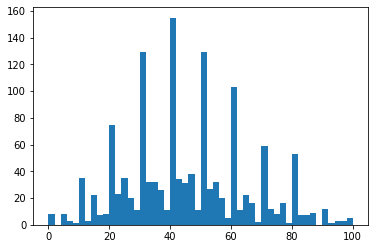

In [ ]:
plt.hist(df['Data'],bins=50)

# Fitting a Normal distribution
From the histogram, the distribution could be modelled as Normal$(\mu,\sigma^2)$. The next step is to estimate $\mu$ and $\sigma$ from the given samples.

## Method of moments
Suppose $m_1$ is the first moment of the samples. The method of moments estimates are obtained by solving
$$m_1=\mu,$$
$$m_2=\mu^2+\sigma^2,$$
The solution results in
$$\hat{\mu}_{MM}=m_1,\hat{\sigma^2}_{MM}=S^2.$$
We now compute the values of $m_1$ (sample mean) and $s^2=m_2-m_1^2$ (sample variance) from the data. After that, we can compute the estimates.

In [ ]:
x = np.array(df['Data'])
m1 = np.average(x)
m2 = np.sum(x**2)/len(x)
ss = np.var(x)
print(m1)
print(m2)
print(ss)

45.02800908402725
2423.3853141559425
395.8637120847018


In [ ]:
mu_MM = m1
sigma_MM = np.sqrt(ss)
print(mu_MM)
print(sigma_MM)

45.02800908402725
19.89632408473238


# Bootstrap for MM and ML

As the unknown parameters $\hat\mu$ and $\hat\sigma$ are same for both MM and ML. So, the bootsrap will be same for both the estimators

In [ ]:
N = 1000
n = 1321
mu_BS = np.zeros(N)
sigma_BS = np.zeros(N)
for i in np.arange(N):
  xi = st.norm.rvs(loc=mu_ML,scale=sigma_ML,size=n)
  m1i = np.average(xi); ssi = np.var(xi)
  mu_BS[i] = m1i; sigma_BS[i] = np.sqrt(ssi)

We can see the histograms of the estimates to get an idea of the spread of the values.

(array([0.02013796, 0.05235869, 0.25373828, 0.70080096, 1.04314626,
        0.95856683, 0.59205598, 0.27387624, 0.0966622 , 0.03624833]),
 array([18.64197934, 18.89026667, 19.138554  , 19.38684133, 19.63512866,
        19.88341599, 20.13170332, 20.37999065, 20.62827798, 20.87656531,
        21.12485265]),
 <a list of 10 Patch objects>)

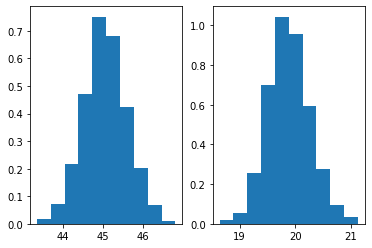

In [ ]:
ax1 = plt.subplot(121)
ax1.hist(mu_BS,density=True)
ax2 = plt.subplot(122)
ax2.hist(sigma_BS,density=True)